# Algoritma K-Means

## Penjelasan Algoritma K-Means

Algoritma K-Means adalah salah satu teknik clustering yang digunakan dalam machine learning untuk mengelompokkan data ke dalam beberapa kelompok atau cluster berdasarkan kemiripan antar data. Tujuan utama dari algoritma K-Means adalah meminimalkan jarak antar data dalam satu kelompok atau cluster dan memaksimalkan jarak antar kelompok atau cluster.

Algoritma K-Means bekerja dengan cara menentukan titik-titik pusat cluster (centroid) secara acak dari data yang akan dikelompokkan, lalu memetakan setiap data ke centroid terdekat dan membentuk cluster. Kemudian, centroid baru dihitung sebagai rata-rata dari data-data dalam setiap cluster, dan data-data dipetakan ke centroid baru untuk membentuk cluster baru. Proses ini diulang hingga tidak ada lagi perubahan dalam pembentukan cluster.

Algoritma K-Means memiliki beberapa kelebihan, antara lain mudah diimplementasikan dan bekerja dengan baik pada data dengan jumlah cluster yang sedang hingga besar. Namun, algoritma ini juga memiliki beberapa kelemahan, seperti sensitif terhadap titik pusat awal yang dipilih secara acak dan tidak dapat menangani data dengan cluster yang tidak berbentuk bola atau berbentuk tidak teratur.

Algoritma K-Means banyak digunakan dalam berbagai bidang, seperti analisis pasar untuk pengelompokkan konsumen, analisis citra untuk pengelompokkan objek dalam citra, dan analisis teks untuk pengelompokkan dokumen berdasarkan topiknya.

## Demonstrasi dengan Scikit-learn

Untuk mendemonstrasikan K-Means, kita akan akan menggunakan contoh data penerbangan fiktif. Data ini berisi 30 penerbangan yang isinya mencakup tiga kolom, yaitu nomor penerbangan, lama terbang (dalam menit), dan jarak yang ditempuh (dalam kilometer). Dari sini kita akan mencoba melihat pembentukan cluster, yaitu kelompok pertama berisi penerbangan yang jarak dan waktu tempuhnya pendek, serta kelompok kedua berisi penerbangan yang jarak dan waktu tempuhnya panjang.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.cluster as cls

In [27]:
df1 = pd.read_csv('penerbangan1.csv')
df1.head()

,Tanggal,id,dari,tujuan,jarak,waktu
0,2019-01-20,G201,Jakarta,Bali,136,50
1,2019-01-20,G014,Medan,Jakarta,44,120
2,2019-01-20,B046,Jakarta,Yogyakarta,155,50
3,2019-01-20,G100,Jakarta,Surabaya,90,60
4,2019-01-20,G781,Jakarta,Yogyakarta,158,50


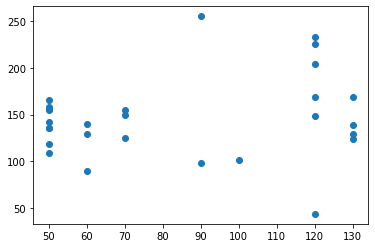

In [28]:
X = df1['waktu']
y = df1['jarak']
plt.scatter(X,y)
plt.show()

In [29]:
df2 = df1[['jarak', 'waktu']]
kmeans = cls.KMeans(n_clusters=2)
kmeans.fit(df2)

KMeans(n_clusters=2)

In [30]:
centroids = kmeans.cluster_centers_
print(centroids)

[[128.33333333  63.88888889]
 [179.6        121.        ]]


In [31]:
centroid_X = centroids[:,0]
centroid_Y = centroids[:,1]

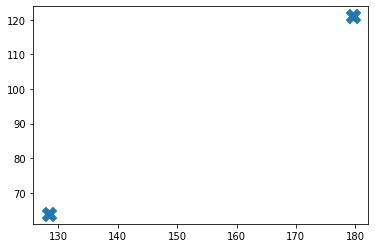

In [36]:
plt.scatter(centroid_X, centroid_Y,  marker='X', s=200)
plt.show()

In [33]:
label = kmeans.labels_
print(label)


[0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0]


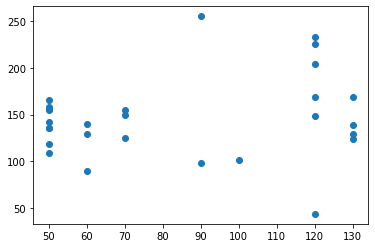

In [35]:
plt.scatter(X,y, cmap = 'rainbow')
plt.show()

In [37]:
kmeans.inertia_

44036.177777777775

c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


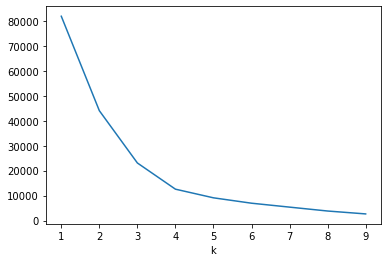

In [38]:
jarak_total = []
K = range(1,10)
for k in K:
    kmeans = cls.KMeans(n_clusters=k)
    kmeans.fit(df2)
    jarak_total.append(kmeans.inertia_)
plt.plot(K, jarak_total)
plt.xlabel('k')
plt.show()